In [449]:
from sympy.combinatorics import Permutation, PermutationGroup
import numpy as np
import math
import sympy
import sympy.functions.combinatorial.numbers as math_num
from scipy.stats import chisquare
from scipy.stats import chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time
from tqdm import tqdm

In [450]:
def conv(x, y, z=5):
    r = max(len(x) - 1, len(y) - 1)
    last_sum1 = 0
    last_sum2 = 0
    while ((last_sum1 < z) | (last_sum2 < z)) &  (r >= 0):
        if (r <= len(x) - 1):
            last_sum1 += x[r]
        if (r <= len(y) - 1):
            last_sum2 += y[r]
        r = r - 1
    r += 1
    new_x = [0 for i in range(r+1)]
    new_y = [0 for i in range(r+1)]
    for i in range(r):
        new_x[i] = x[i]
        new_y[i] = y[i]
    new_x[r] = last_sum1   
    new_y[r] = last_sum2
    # new_x, new_y = np.trim_zeros(new_x), np.trim_zeros(new_y)
    #while 0 in new_x: new_x.remove(0)
    #while 0 in new_y: new_y.remove(0)
    #while(new_y[0] == 0):
    #    new_y = new_y[1:]
    return (new_x, new_y)

In [451]:
def chi(O, E):
    print(O)
    print(E)
    O,E = conv(O, E)
    l = len(O)
    while 0 in O: O.remove(0)
    while 0 in E: E.remove(0)
    print(O)
    print(E)
    r = 0
    for i in range(len(O)):
        r += (O[i] - E[i])**2/E[i]
    return (r, l)

## Permutation

In [452]:
n = 20  # длина подстановки
N = 2 ** 12 # размер выборки подстановок

num_of_cycles = [0 for k in range(n+1)]
num_of_fixed_points = [0 for k in range(n+1)]
num_shortest_cycle = [0 for k in range(n+1)]
num_of_orders = {}

a = Permutation(np.random.permutation(n))

for i in range(N):
    a = Permutation(np.random.permutation(n))
    cycle_num = a.cycles
    num_of_cycles[a.cycles] += 1
    if 1 in a.cycle_structure.keys():
        num_of_fixed_points[a.cycle_structure[1]]  += 1
    else:
        num_of_fixed_points[0] += 1
    num_shortest_cycle[min(a.cycle_structure.keys())] += 1 
    order = 1
    for x in list(a.cycle_structure.keys()):
        order = np.lcm(order, x)
    if order in num_of_orders:
        num_of_orders[order] += 1
    else:
        num_of_orders[order] = 1
    
    
print(num_of_cycles)
print(num_of_fixed_points)
print(num_shortest_cycle)
print(num_of_orders)

#print(a)
#print(a.list())
#print(a.inversions())
#print(a.is_even)


[0, 202, 717, 1073, 1031, 661, 294, 90, 23, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1476, 1545, 751, 256, 56, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2620, 564, 263, 143, 80, 65, 52, 52, 40, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202]
{20: 252, 84: 103, 12: 228, 88: 48, 19: 227, 70: 100, 60: 229, 34: 108, 15: 110, 24: 154, 42: 191, 72: 55, 26: 13, 14: 27, 99: 40, 165: 28, 52: 50, 30: 239, 44: 31, 51: 78, 35: 6, 4: 1, 420: 14, 66: 96, 17: 52, 18: 257, 56: 27, 220: 22, 10: 39, 120: 51, 126: 23, 91: 52, 40: 100, 132: 34, 16: 152, 90: 74, 9: 15, 48: 75, 78: 100, 180: 25, 36: 60, 130: 36, 210: 40, 168: 34, 63: 17, 156: 30, 39: 28, 280: 14, 21: 9, 140: 20, 77: 24, 8: 27, 110: 34, 154: 15, 65: 30, 28: 79, 45: 22, 22: 1, 55: 1, 252: 20, 6: 13, 33: 8, 105: 8}


## Comparison of statistical distributions

In [453]:
# Неподвижные точки
E_prob_of_fixed_points = [((1 / math.factorial(k)) * (sympy.subfactorial(n - k) / math.factorial(n - k))) for k in range(n+1)]
E_num_of_fixed_points = [ x*N  for x in E_prob_of_fixed_points]
(num_of_fixed_points_stat, points_array_len) = chi(num_of_fixed_points, E_num_of_fixed_points)

# print(E_num_of_fixed_points)

points_quantile = chi2.ppf(1-0.05, df=points_array_len-1)
p_value = chi2.sf(float(num_of_fixed_points_stat), int(points_array_len-1))

print("Квантиль степени " + str(points_array_len - 1) + " = " + str(points_quantile))
print("Статистика для k неподвижных точек = " + str(num_of_fixed_points_stat))
print("p-value = " + str(p_value))

[1476, 1545, 751, 256, 56, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1506.8341910382278, 1506.8341910382278, 753.4170955191139, 251.1390318397045, 62.78475795992661, 12.55695159198369, 2.0928252653349655, 0.2989750378956728, 0.03737187975327305, 0.004152431060132413, 0.0004152431342907533, 3.7749347567101836e-05, 3.145802528518578e-06, 2.419684959367499e-07, 1.729278625222188e-08, 1.1485020303362455e-09, 7.341277182547023e-11, 3.8385763045997505e-12, 3.198813587166459e-13, 0, 1.68358609850866e-15]
[1476, 1545, 751, 256, 56, 12]
[1506.8341910382278, 1506.8341910382278, 753.4170955191139, 251.1390318397045, 62.78475795992661, 14.9907326047995]
Квантиль степени 5 = 11.070497693516351
Статистика для k неподвижных точек = 3.02933430067756
p-value = 0.6954631713048067


In [454]:
# Длины циклов
E_prob_of_cycles = [((1 / math.factorial(n)) * math_num.stirling(n, k, kind=1)) for k in range(len(num_of_cycles))]
E_num_of_cycles = [ x*N  for x in E_prob_of_cycles]
(num_of_cycle_stat, cycle_array_len) = chi(num_of_cycles, E_num_of_cycles)

#print(E_num_of_cycles)

cycle_quantile = chi2.ppf(1-0.05, df=cycle_array_len-1)
p_value = chi2.sf(float(num_of_cycle_stat), int(cycle_array_len-1))

print("Квантиль степени " + str(cycle_array_len - 1) + " = " + str(cycle_quantile))
print("Статистика для ровно k циклов = " + str(num_of_cycle_stat))
print("p-value = " + str(p_value))

[0, 202, 717, 1073, 1031, 661, 294, 90, 23, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 204.800000000000, 726.577081783026, 1125.66204732999, 1027.18294359335, 625.258265172022, 271.780860308024, 87.9857303966310, 21.8085631613971, 4.21546179333437, 0.642998663357349, 0.0779174551850919, 0.00751759369541556, 0.000576211571214511, 3.48383353968304e-5, 1.63971504359511e-6, 5.87856848879777e-8, 1.54982518298215e-9, 2.83095002464232e-11, 3.19881358716646e-13, 1.68358609850866e-15]
[202, 717, 1073, 1031, 661, 294, 90, 28]
[204.800000000000, 726.577081783026, 1125.66204732999, 1027.18294359335, 625.258265172022, 271.780860308024, 87.9857303966310, 26.7530714169552]
Квантиль степени 8 = 15.50731305586545
Статистика для ровно k циклов = 6.60624191158674
p-value = 0.5796488398338445


In [455]:
# Кратчайший цикл имеет длину k

def expindex(x, M):
    res = x
    for i in range(2, M + 1):
        res += (x**i) / i
    return -res

def nthcoeff(f, x, n):
    res = sympy.diff(f, x, n)
    return res.subs(x, 0) / math.factorial(n)

def get_polynom_for_cycle_length(M, n): 
    x = sympy.Symbol('x')
    f = 1 - sympy.exp(-x) if  M == 0 else sympy.exp(expindex(x, M)) - sympy.exp(expindex(x, M + 1))
    return nthcoeff(f / (1 - x), x, n)

def gen_prob_of_shortest_cycles(n):
    t = time.perf_counter()
    short_cycle_length_exp = [0] * n
    for i in tqdm(range(math.floor(n / 2) + 1)):
        short_cycle_length_exp[i] = get_polynom_for_cycle_length(i, n) 
    short_cycle_length_exp[n-1] = get_polynom_for_cycle_length(n-1, n)
    exp = np.array(np.array([float(i) for i in short_cycle_length_exp]))
    # exp = np.trim_zeros(np.sort(exp))
    return exp

def gen_prob_of_shortest_cycles2(n):
    exp = [0] * n
    for i in range(1, math.floor(n / 2)):
        exp[i] = math.exp(-sympy.harmonic(i)) - math.exp(-sympy.harmonic(i+1))
    exp[0] = 1 - math.exp(-1)
    exp[n-1] = 1 / n
    return exp


In [456]:
# Кратчайший цикл имеет длину k

E_prob_of_shortest_cycle = gen_prob_of_shortest_cycles2(n) # without 2 -> its coeff method
E_num_of_shortest_cycle = [ x*N  for x in E_prob_of_shortest_cycle]

#num_shortest_cycle = gen_prob_of_shortest_cycles2(n)
#num_shortest_cycle = [ x*N  for x in num_shortest_cycle]

(shortest_cycle_stat, shortest_cycle_array_len) = chi(num_shortest_cycle, E_num_of_shortest_cycle)

shortest_cycle_quantile = chi2.ppf(1-0.05, df=shortest_cycle_array_len-1)
p_value = chi2.sf(float(shortest_cycle_stat), int(shortest_cycle_array_len-1))

print("Квантиль степени " + str(shortest_cycle_array_len - 1) + " = " + str(shortest_cycle_quantile))
print("Статистика для минимального цикла длины k = " + str(shortest_cycle_stat))
print("p-value = " + str(p_value))

[0, 2620, 564, 263, 143, 80, 65, 52, 52, 40, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202]
[2589.165808961772, 592.8930550702593, 259.0736960255423, 144.8561649072986, 92.44935974735574, 64.10338498635036, 47.05314190493931, 36.00358220135672, 28.435638674107793, 23.026125249243506, 0, 0, 0, 0, 0, 0, 0, 0, 0, 204.8]
[2620, 564, 263, 143, 80, 65, 52, 52, 40, 15, 202]
[2589.165808961772, 592.8930550702593, 259.0736960255423, 144.8561649072986, 92.44935974735574, 64.10338498635036, 47.05314190493931, 36.00358220135672, 28.435638674107793, 23.026125249243506, 204.8]
Квантиль степени 19 = 30.14352720564616
Статистика для минимального цикла длины k = 18.71377932332211
p-value = 0.4753307342423927


In [457]:
# Порядки подстановок
#E_prob_of_orders = [((1 / math.factorial(n)) * math_num.stirling(n, k, kind=1)) for k in range(len(num_of_cycles))]
#E_num_of_orders = [ x*N  for x in E_prob_of_cycles]
#(order_stat, order_array_len) = chi(num_of_orders, E_num_of_orders)

#print(E_num_of_cycles)

#cycle_quantile = chi2.ppf(1-0.05, df=cycle_array_len-1)
#p_value = chi2.sf(float(num_of_cycle_stat), int(cycle_array_len-1))

#print("Квантиль степени " + str(cycle_array_len - 1) + " = " + str(cycle_quantile))
#print("Статистика для ровно k циклов = " + str(num_of_cycle_stat))
#print("p-value = " + str(p_value))

## Show distributions

         D1        D2  x
0  0.000000  0.000000  0
1  0.049316  0.050000  1
2  0.175049  0.177387  2
3  0.261963  0.274820  3
4  0.251709  0.250777  4
5  0.161377  0.152651  5
6  0.071777  0.066353  6
7  0.021973  0.021481  7
8  0.005615  0.005324  8
9  0.001221  0.001207  9
         D1        D2  x
0  0.000000  0.000000  0
1  0.049316  0.050000  1
2  0.175049  0.177387  2
3  0.261963  0.274820  3
4  0.251709  0.250777  4
5  0.161377  0.152651  5
6  0.071777  0.066353  6
7  0.021973  0.021481  7
8  0.005615  0.005324  8
9  0.001221  0.001207  9


/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


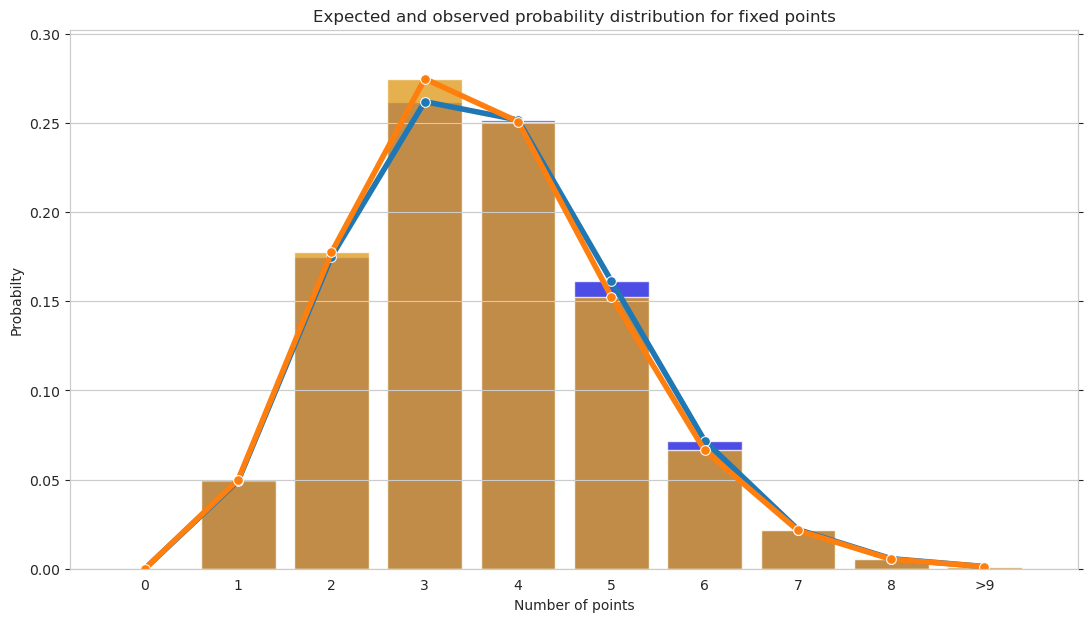

In [458]:
# x,y - two arrays with distribution, r - first x label
def compare_two_distr_graph(x, y, r=0):
    df_to_show = pd.DataFrame(columns = ['D1', 'D2'])
    df_to_show['D1'], df_to_show['D2'] = conv(x, y, 0.001)
    df_to_show['D1'], df_to_show['D2'] = df_to_show['D1'].astype(float), df_to_show['D2'].astype(float)
    df_to_show['x'] = [k for k in range(0, len(df_to_show))]
    print(df_to_show)
    xticklabels= [k for k in range(r, len(df_to_show)+r)]
    xticklabels[len(df_to_show)-1] = '>' + str(len(df_to_show)+r-1)
    width = 0.8
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style="whitegrid", rc=None)
    fig, ax = plt.subplots(figsize=(13,7))
    ax_twin = ax.twinx()
    sns.barplot(data = df_to_show, x='x', y='D1', alpha=0.8, ax=ax, color = 'blue', width=width)
    sns.barplot(data = df_to_show, x='x', y='D2', alpha=0.8, ax=ax, color = 'red', width=width).set(xlabel = "Number of points",ylabel='Probabilty', xticklabels=xticklabels)
        
    sns.lineplot(data = df_to_show, x='x', y='D1', marker='o', err_style='bars', ax=ax_twin, sort = False, linewidth = 4, markersize=7).set(ylabel='Probabilty')
    sns.lineplot(data = df_to_show, x='x', y='D2', marker='o', err_style='bars', ax=ax_twin, sort = False, linewidth = 4, markersize=7).set(title='Expected and observed probability distribution for fixed points', yticklabels=[], ylabel=None)
     
    max_x = len(df_to_show)
    max_y = max(max(df_to_show['D1']), max(df_to_show['D2']))*1.1
    ax.set_xlim([-width, max_x])
    ax.set_ylim([0, max_y])
    ax_twin.set_xlim([-width, max_x])
    ax_twin.set_ylim([0, max_y])
    ax.legend() ## add legend

prob_of_fixed_points = [k/N for k in num_of_fixed_points]
compare_two_distr_graph(prob_of_fixed_points, E_prob_of_fixed_points, 1)

## Correlation table

In [459]:
def count_records(permutation: Permutation): 
    maximum = -1
    records = 0 
    for index, elem in enumerate(permutation.list()): 
         if elem > maximum: 
            records += 1
            maximum = elem    
    return records

In [460]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

def calculate_avg_length(a):
    r = k = 0
    for i in a:
        r += k*i
        k += 1
    return r

In [462]:
# correlation table

corr_df = pd.DataFrame(columns=['n','N','FP & SC', 'FP & Rec', 'FP & NoC', 'FP & Ord', 'FP & Inv', 'FP & Evn',
                                'SC & Noc', 'SC & Rec', 'SC & Ord', 'SC & Inv', 'SC & Evn', 'Rec & NoC',
                                'Rec & Ord', 'Rec & Inv', 'Rec & Evn', 'Noc & Ord', 'Noc & Inv', 'Noc & Evn',
                                'Ord & Inv', 'Ord & Evn', 'Inv & Evn'])

# длина подстановки n
# длина выборки N
n_N_values = [(10, 2**10), (10, 2**12), (10, 2**14), (10, 2**16), (10, 2**18),
              (25, 2**10), (25, 2**12), (25, 2**14), (25, 2**16), (25, 2**18),
              (50, 2**10), (50, 2**12), (50, 2**14), (50, 2**16), (50, 2**18),
              (100, 2**10), (100, 2**12), (100, 2**14), (100, 2**16), (100, 2**18),
              (200, 2**10), (200, 2**14), (200, 2**16), (200, 2**18),
              (500, 2**10), (500, 2**14), (500, 2**16), (500, 2**18),
              (1000, 2**10), (1000, 2**14), (1000, 2**16) 
             ]

t1 = time.perf_counter()

for p in n_N_values[26:27]:
    
    n, N = p
    
    # 'Fixed points','Shortest cycle','Records', 'Number of cycles', 'Order', 'Inversions', 'Even'
    df = pd.DataFrame(columns=['FP','SC','Rec', 'NoC', 'Ord', 'Inv', 'Evn'])

    num_of_cycles = 0
    num_of_fixed_points = 0
    length_of_shortes_cycle = 0
    order = 1
    even = 0
    inversions = 0
    
    for i in tqdm(range(N)):
        a = Permutation(np.random.permutation(n))
        num_of_cycles = a.cycles
        if 1 in a.cycle_structure.keys():
            num_of_fixed_points = a.cycle_structure[1]
        else:
            num_of_fixed_points = 0
        length_of_shortes_cycle = min(a.cycle_structure.keys())
        num_of_records = count_records(a)
        order = 1
        for x in list(a.cycle_structure.keys()):
            order = np.lcm(order, x)
        even = a.is_even
        inversions = a.inversions()
        df.loc[len(df)] = [num_of_fixed_points, length_of_shortes_cycle, num_of_records, num_of_cycles, order, inversions, even]        
            
    print("n="+ str(n), "N=" + str(N), " - Done," + " Time: " + str(round(time.perf_counter() - t1, 1)))
    df = df.astype({"Evn": int})
    #for col in df.columns:
    #    df[col] = min_max_scaling(df[col])
    cm = df.corr()
    corr_df.loc[len(corr_df)] = [n, N, cm['FP']['SC'], cm['FP']['Rec'], cm['FP']['NoC'], cm['FP']['Ord'], cm['FP']['Inv'],
                                 cm['FP']['Evn'], cm['SC']['Rec'], cm['SC']['NoC'], cm['SC']['Ord'], cm['SC']['Inv'], cm['SC']['Evn'],
                                 cm['Rec']['NoC'], cm['Rec']['Ord'], cm['Rec']['Inv'], cm['Rec']['Evn'], cm['NoC']['Ord'],
                                 cm['NoC']['Inv'], cm['NoC']['Evn'], cm['Ord']['Inv'], cm['Ord']['Evn'], cm['Inv']['Evn'],
                                ]


corr_df = corr_df.round(3)
corr_df = corr_df.astype({"n": int, "N": int})
# df.to_csv("./df.csv", index=None)  
# df.to_csv("./df.csv", index=None, mode='a', header=None)  
# corr_df.to_csv("./corr.csv", index=None)  
corr_df.to_csv("./corr.csv", index=None, mode='a', header=None)  

100%|█████████████████████████████████████| 65536/65536 [22:33<00:00, 48.43it/s]

n=500 N=65536  - Done, Time: 1353.2


<AxesSubplot:>

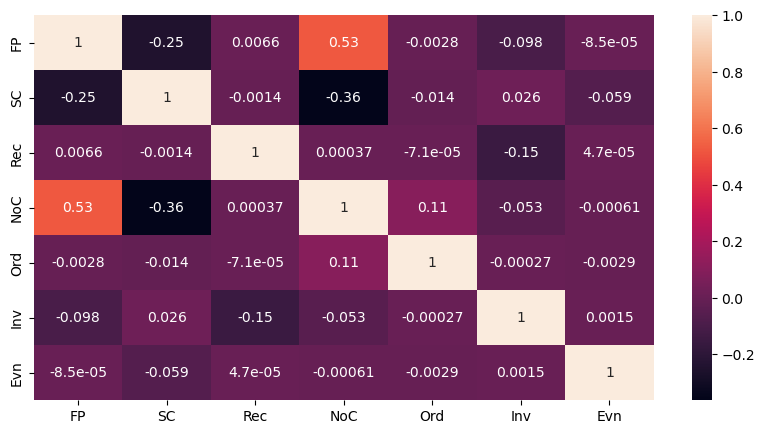

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [94]:
print(df)

        FP  SC  Rec  NoC  Ord  Inv  Evn
0        1   1    3    4  114  139    0
1        1   1    3    5  132  198    1
2        0   3    3    4  330  179    0
3        1   1    5    5  264  152    1
4        1   1    4    3   95  110    1
...     ..  ..  ...  ...  ...  ...  ...
262139   2   1    3    4   42  151    0
262140   1   1    5    4  240  149    0
262141   0   3    3    2   66  179    0
262142   0   2    2    5  120  116    1
262143   0   2    3    5   30  192    1

[262144 rows x 7 columns]
